## 1. BUSINESS UNDERSTANDING


In the context of the telecom industry, building a predictive model to forecast customer churn for SyriaTel, a telecommunications company, is crucial for business sustainability and growth. Identifying patterns that precede customer attrition allows SyriaTel to proactively address potential issues and retain valuable customers. The predictive model aims to assess how effectively it can anticipate customer churn, providing insights into the factors influencing retention. This understanding is pivotal for SyriaTel's management, enabling informed decision-making to enhance customer satisfaction and loyalty. Insights into the significance of various features in predicting churn contribute to strategic planning, allowing SyriaTel to allocate resources efficiently and tailor retention strategies. Recommendations derived from the model offer actionable insights into specific scenarios where predictions are most useful, guiding the business in adapting variables to achieve targeted outcomes. Ultimately, this predictive approach empowers SyriaTel to implement preemptive measures, reduce customer churn, and foster long-term relationships with its clientele.

## 2. DATA UNDERSTANDING
In this section, we will focus on the initial steps of a data analysis, which involve importing the data and conducting an audit or examination of the dataset. our aim at this stage is essential checking and ensuring on the data's quality, understanding its structure, and preparing it for subsequent analysis.

In [52]:
# Importing Necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, BayesianRidge, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

### 2.1 Data Loading, Data Viewing and Data Description

In [2]:
# loading data
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
# Viewing the first 10 rows
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [4]:
# Checking the total number of rows and columns of the dataset
df.shape

(3333, 21)

In [5]:
# checking the details of the column
for column in df.columns:
    print(column)

state
account length
area code
phone number
international plan
voice mail plan
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
customer service calls
churn


In [6]:
# Understanding the data, i.e total entries, datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Understanding the data and description
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 2.2 Checking for Duplicates, Null values and Outliers

In [8]:
# Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [9]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
# Checking null values
null_values = df.isnull().sum()
null_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

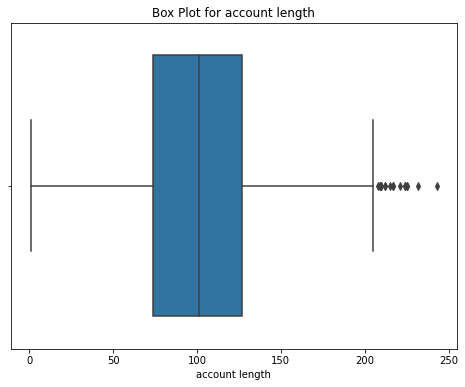

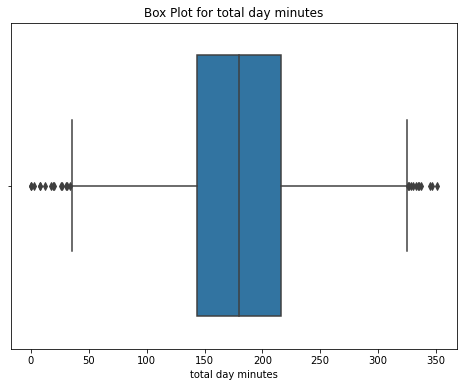

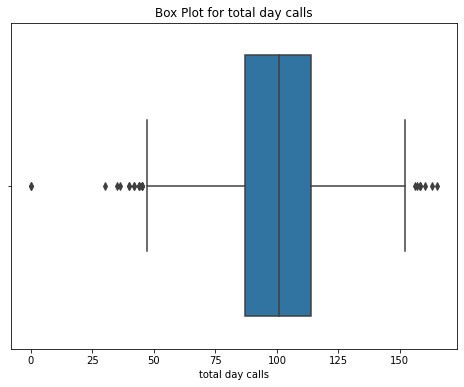

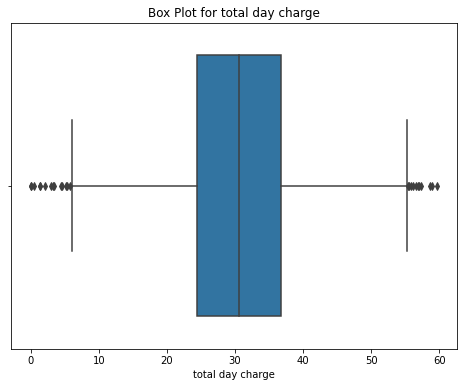

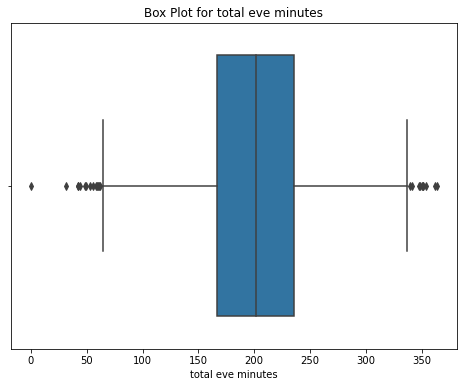

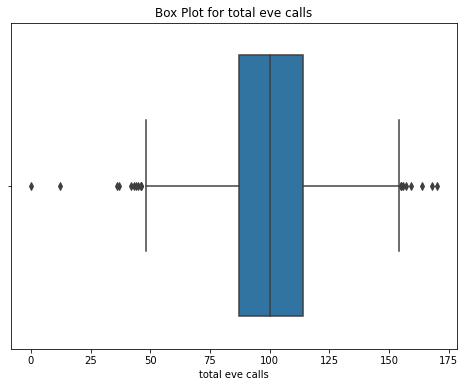

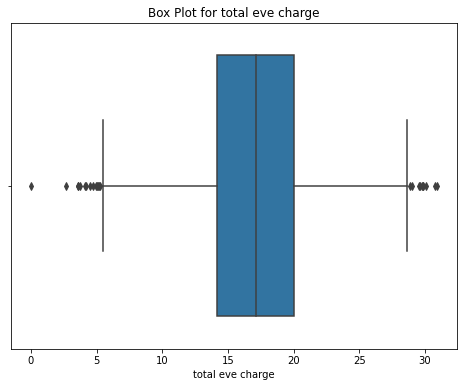

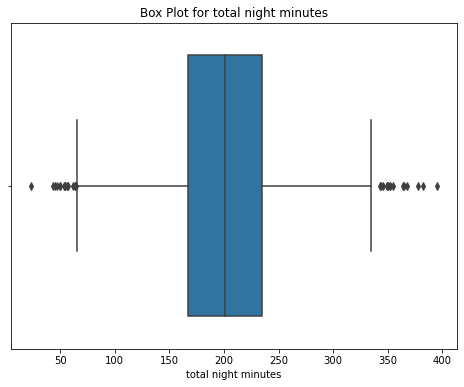

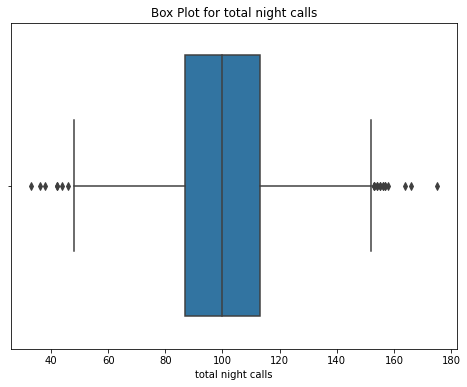

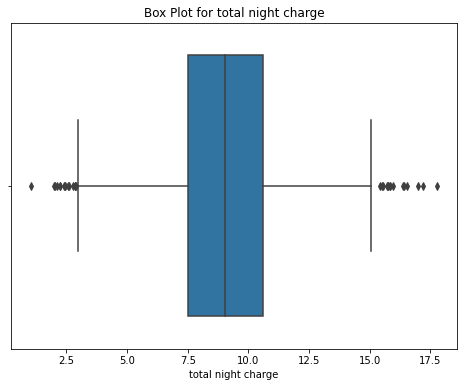

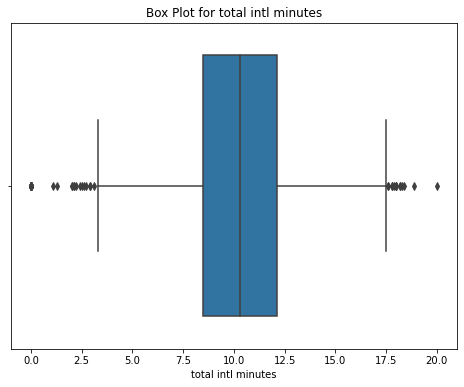

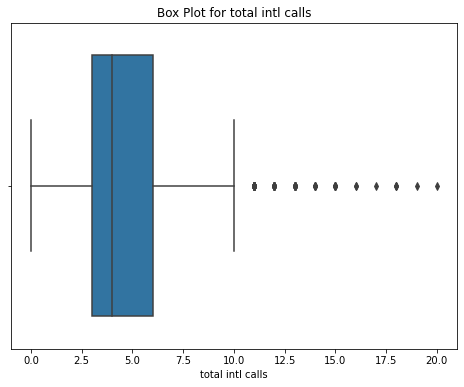

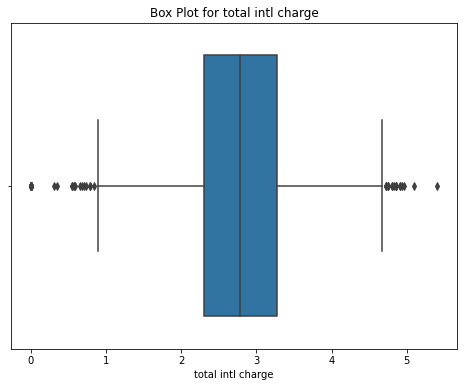

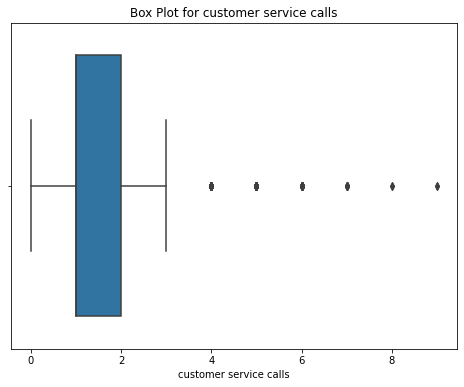

In [11]:
# Checking for outliers
columns_of_interest = ['account length', 'total day minutes', 'total day calls', 'total day charge', 
                        'total eve minutes', 'total eve calls', 'total eve charge', 
                        'total night minutes', 'total night calls', 'total night charge', 
                        'total intl minutes', 'total intl calls', 'total intl charge', 
                        'customer service calls']
# Creating a box plot for each column
for column in columns_of_interest:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

Upon reviewing the dataset as shown above, the dataset has no null values, no duplicates, no missing values and no outliers.

## 3. DATA PREPARATION

This is a crucial phase in the data science pipeline, encompassing both data preprocessing and analysis to ensure that raw datasets are transformed into a clean, structured format suitable for effective modeling. It involves handling missing values, outliers, and duplicates, as well as scaling and encoding variables to improve the quality and relevance of the data. 
Concurrently, data analysis entails exploring and understanding the dataset through descriptive statistics, visualizations, and correlation analyses, unveiling patterns, relationships, and potential biases. This iterative process sets the foundation for building robust machine learning models, enhancing their predictive capabilities and reliability by addressing challenges within the data. A meticulous approach to data preparation is essential for deriving meaningful insights and fostering the success of subsequent analytical endeavors.

### 3.1 Categorical Values
In this section we focus on analyzing and understanding categorical variables. This process is crucial for gaining insights into the distribution and characteristics of categorical variables.


In [12]:
categoricals = []  # List to store categorical columns
numerics = []     # List to store numeric columns

for column in df.columns:
    if df[column].dtype == 'object':
        categoricals.append(column)  # Append object-type columns to categoricals list
    else:
        numerics.append(column)  # Append numeric-type columns to numerics list
def print_value_counts(dataframe, columns):
    for column in columns:
        print(f"Value counts for '{column}':")
        
        # Calculate value counts
        value_counts = dataframe[column].value_counts(dropna=False)
        
        print(value_counts)
        print("\n\n")

In [13]:
# print value counts for categorical columns
print_value_counts(df, categoricals)

Value counts for 'state':
WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MS     65
MA     65
AZ     64
FL     63
MO     63
ME     62
ND     62
NM     62
OK     61
DE     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64



Value counts for 'phone number':
406-5532    1
361-7702    1
401-4007    1
327-3587    1
380-7624    1
           ..
379-7290    1
359-3618    1
330-5824    1
365-4387    1
397-9928    1
Name: phone number, Length: 3333, dtype: int64



Value counts for 'international plan':
no     3010
yes     323
Name: international plan, dtype: int64



Value counts for 'voice mail plan':
no     2411
yes     922
Name: voice mail plan, dtype: int

### 3.2 Exploratory Data Analysis (EDA)
#### 3.2.1 Univariate Analysis
Univariate analysis is a statistical method used to analyze a single variable at a time. It focuses on understanding the characteristics and patterns of a single variable in isolation, without considering the relationships with other variables.

In [14]:
# Exploring the target variable(churn)
y = df.churn.value_counts()
y

False    2850
True      483
Name: churn, dtype: int64

<AxesSubplot:>

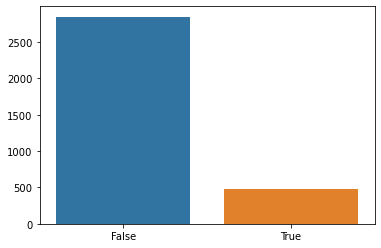

In [15]:
# visualizing the distribution of our target variable
sns.barplot(x = y.index, y = y.values)

From the bar graph above, we have an imbalanced data since False class has much more datapoints compared to the True class.

In [16]:
# Dropping columns we will not require in our analysis and keeping our original dataframe
df1 = df.copy()

columns_dropped = ['phone number', 'area code', 'voice mail plan', 'number vmail messages']
df1.drop(columns=columns_dropped, inplace=True, axis=1)
df1.head()

,state,account length,international plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 3.2.2 Bivariate Analysis
Bivariate analysis is a statistical method that involves the simultaneous analysis of two variables to understand their relationship or association. Unlike univariate analysis, which focuses on a single variable, bivariate analysis explores connections between pairs of variables.

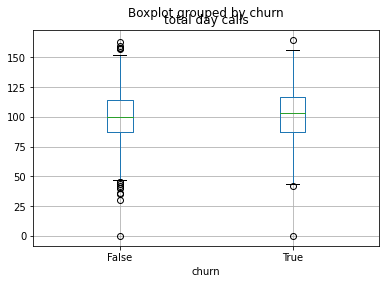

Maximum day calls: 165
Minimum day calls: 0
Average day calls: 100.43564356435644


In [17]:
# Checking relationship between the total number of day calls and churn risk
df1.boxplot(column = 'total day calls', by = 'churn')
plt.show()

print("Maximum day calls:" , df1['total day calls'].max())

print("Minimum day calls:" , df1['total day calls'].min())
print("Average day calls:" , df1['total day calls'].mean())

We notice the average day calls is 100. The boxplot above shows that the churn risk is higher on customers who make more calls than average. 

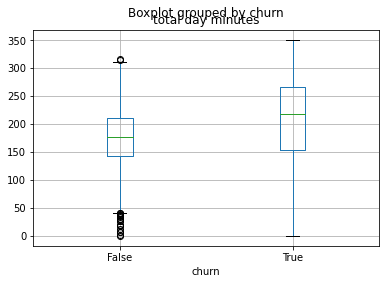

Maximum day minutes: 350.8
Minimum day minutes: 0.0
Average day minutes: 179.77509750975094


In [18]:
# Checking relationship between the total day minutes and churn risk
df1.boxplot(column = 'total day minutes', by = 'churn')
plt.show()
print("Maximum day minutes:" , df1['total day minutes'].max())

print("Minimum day minutes:" , df1['total day minutes'].min())
print("Average day minutes:" , df1['total day minutes'].mean())

The boxplot suggests that customers who talk for more minutes than average, are at a higher churm risk since minutes could be tied to the charges incurred.

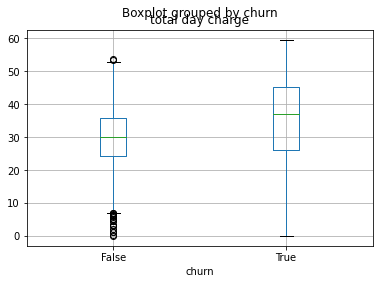

Maximum day charge: 59.64
Minimum day charge: 0.0
Average day charge: 30.562307230723075


In [19]:
# Checking the relationship between the total day charges and churn risk
df1.boxplot(column = 'total day charge', by = 'churn')
plt.show()
print("Maximum day charge:" , df1['total day charge'].max())
print("Minimum day charge:" , df1['total day charge'].min())
print("Average day charge:" , df1['total day charge'].mean())

The boxplot above shows that the average charges for customers who are at a higher churn risk is higher than for customers who are are at lower churn risk. Therefore, it is safe to say that increasing charges would increase the churn risk.

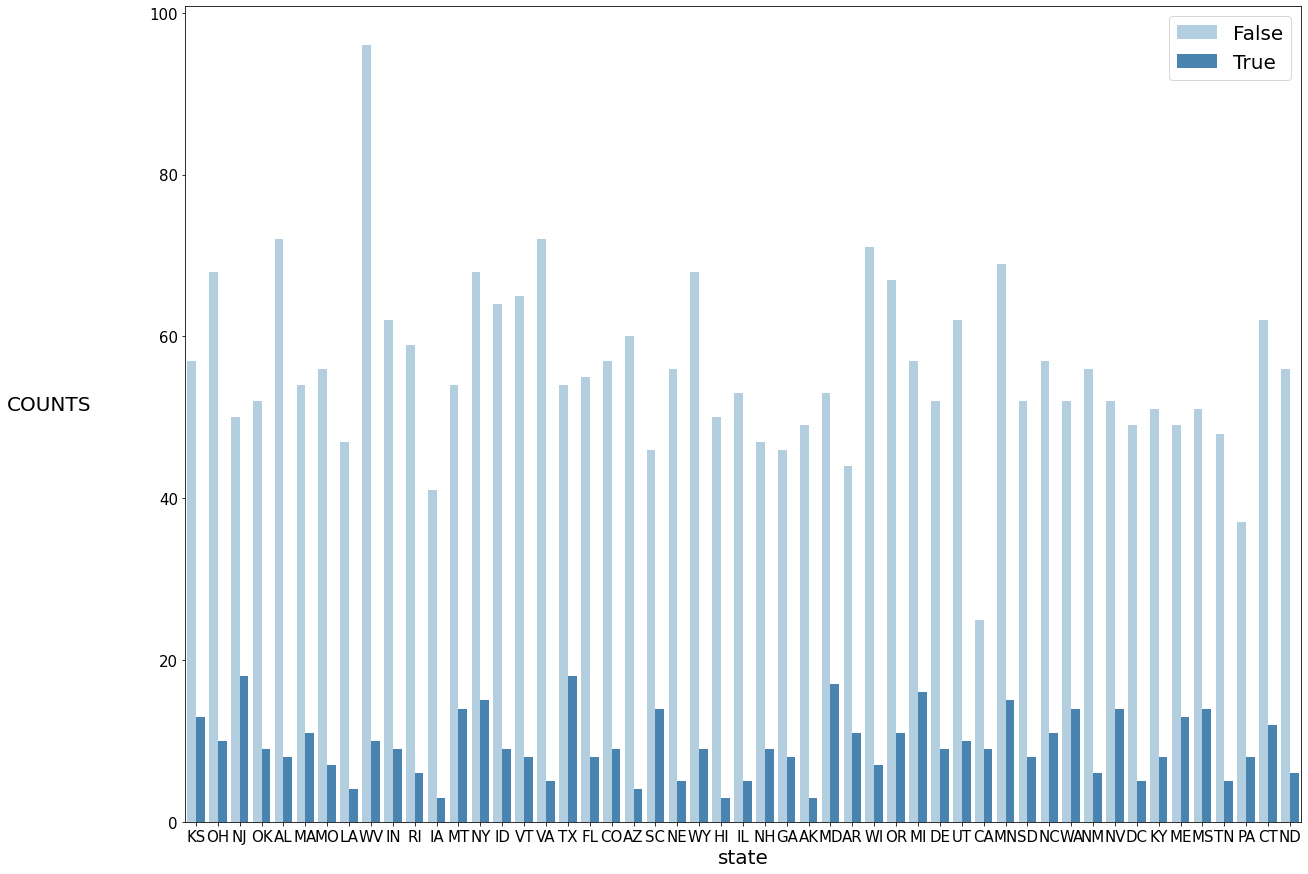

In [20]:
# Checking the risk of churn per state
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.countplot(x='state', hue='churn', data=df1, palette='Blues')
ax.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
ax.set_xlabel('state', size=20)
ax.legend(loc=0,fontsize=20);

ax.tick_params(labelsize=15)

From the visualization above we realize that the customers' churn risk are highest in Texas, Maryland and New Jersey

## 4. MODELING
Developing a robust binary classification model for predicting customer churn involves a systematic process that combines data preparation, feature engineering, model selection, and evaluation. It also involves a combination of domain knowledge, data expertise, and a thorough understanding of machine learning techniques.

In [21]:
# Preparing data for modeling
# First we map 'yes' to '1' and 'no' to 0 from the international plan column
international_plan_mapping = {'yes': 1, 'no': 0}

# Applying the mapping to the 'internation plan' column
df1['international_plan'] = df1['international plan'].map(international_plan_mapping)

# Drop the original 'international_plan' column
df_new = df1.drop(columns=['international plan'])
df_new.head()

,state,account length,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international_plan
0,KS,128,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1
4,OK,75,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1


In [22]:
# Mapping the states to numeric values
state_mapping = {'KS': 1, 'OH': 2, 'NJ': 3, 'OK': 4, 'AL': 5, 'MA': 6, 'MO': 7,'LA': 8, 'WV': 9, 'IN': 10, 'RI': 11,
       'IA': 12, 'MT': 13, 'NY': 14, 'ID': 15, 'VT':16, 'VA': 17, 'TX': 18, 'FL': 19, 'CO': 20, 'AZ': 21, 'SC': 22,
       'NE': 23, 'WY': 24, 'HI': 25, 'IL': 26, 'NH': 27, 'GA': 28, 'AK': 29, 'MD': 30, 'AR': 31, 'WI': 32, 'OR': 33,
       'MI': 34, 'DE': 35, 'UT': 36, 'CA': 37, 'MN': 38, 'SD': 39, 'NC': 40, 'WA': 41, 'NM': 42, 'NV': 43, 'DC': 44,
       'KY': 45, 'ME': 46, 'MS': 47, 'TN': 48, 'PA': 49, 'CT': 50, 'ND': 51}
# Apply the mapping to the 'state' column
df_new['state_number'] = df_new['state'].map(state_mapping)

# Drop the original 'state' column
df_new = df_new.drop('state', axis=1)
df_new.head()

,account length,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international_plan,state_number
0,128,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,1
1,107,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,2
2,137,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,3
3,84,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1,2
4,75,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1,4


In [23]:
# Checking the new dataset information
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   total day minutes       3333 non-null   float64
 2   total day calls         3333 non-null   int64  
 3   total day charge        3333 non-null   float64
 4   total eve minutes       3333 non-null   float64
 5   total eve calls         3333 non-null   int64  
 6   total eve charge        3333 non-null   float64
 7   total night minutes     3333 non-null   float64
 8   total night calls       3333 non-null   int64  
 9   total night charge      3333 non-null   float64
 10  total intl minutes      3333 non-null   float64
 11  total intl calls        3333 non-null   int64  
 12  total intl charge       3333 non-null   float64
 13  customer service calls  3333 non-null   int64  
 14  churn                   3333 non-null   

### 4.1 Checking the correlation between the target    feature(Churn risk) and the predictors
In the process of developing a predictive model for customer churn, understanding the correlation between the target feature and the predictor variables is crucial. Correlation analysis provides insights into the strength and direction of linear relationships between the features and the likelihood of churn. By examining the correlation coefficients, one can identify which predictors exhibit a notable influence on the target variable. 

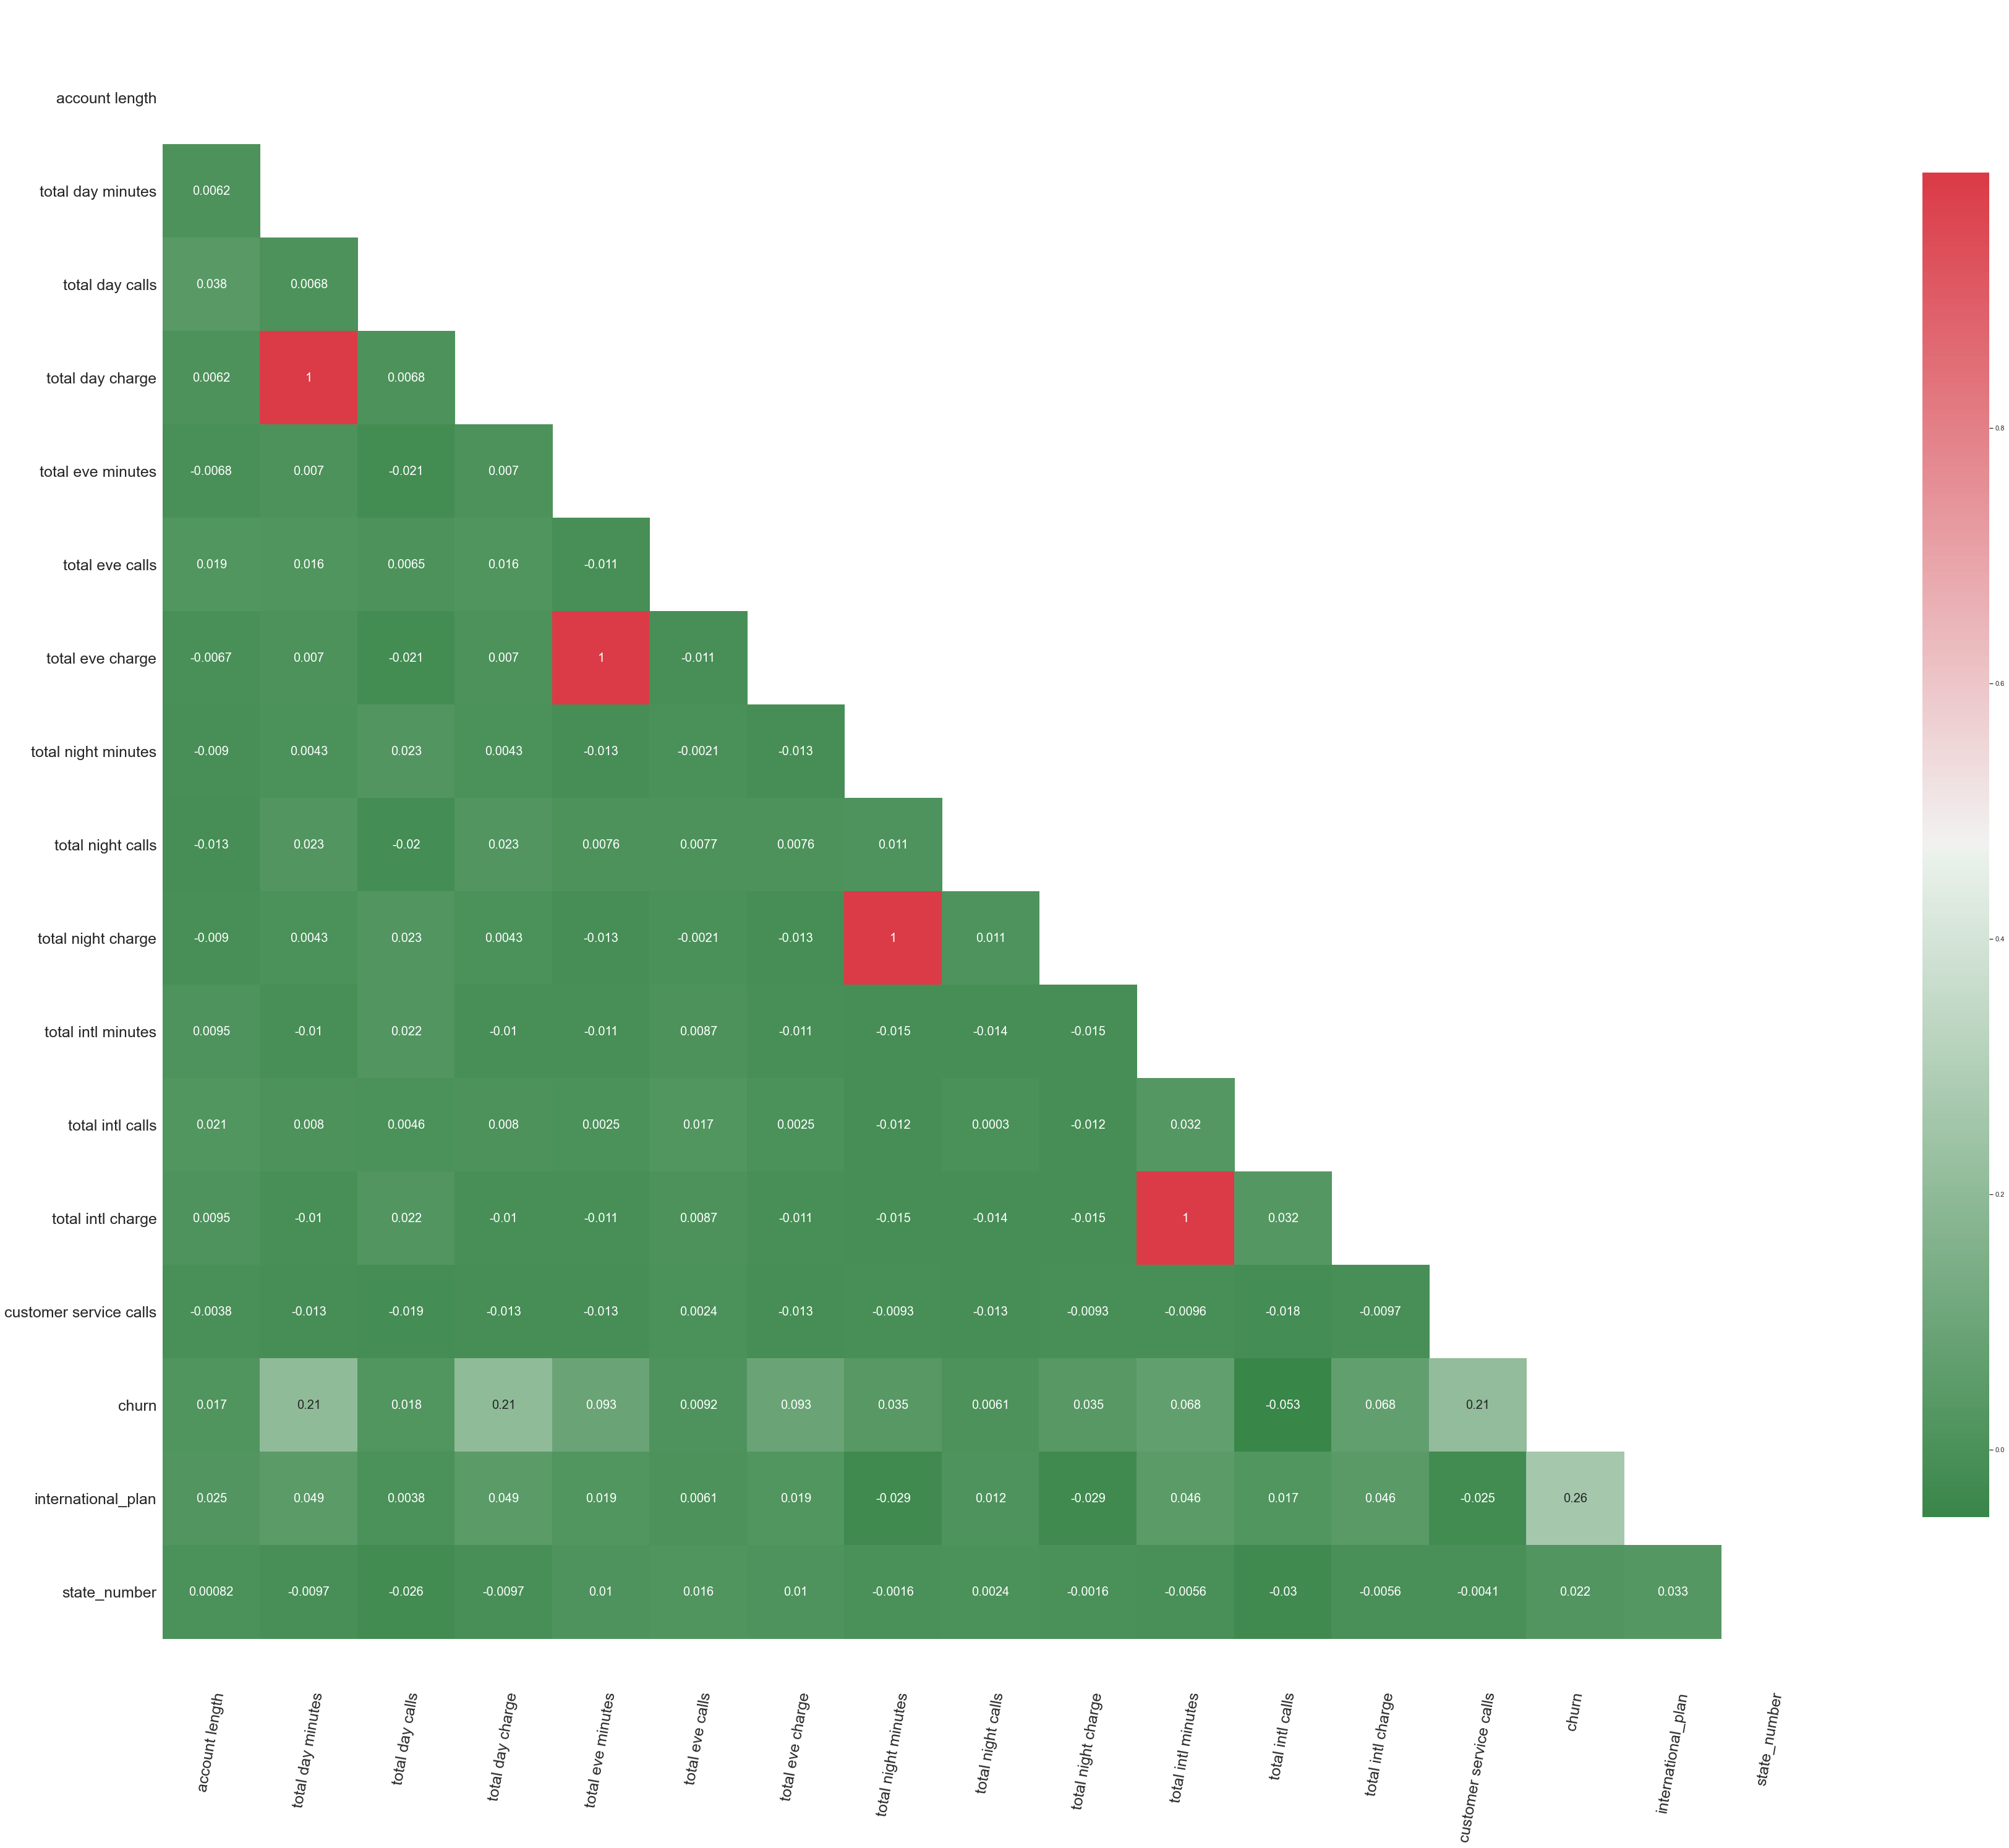

In [24]:
# Plotting our features on a correlation matrix to remove anything that might cause multi-colinearity within our model

sns.set(style="white")

# Creating the data
data = df_new.corr()

# Generating a mask for the upper triangle
mask = np.zeros_like(data, dtype=bool)
mask[np.triu_indices_from(mask)] = True


# Setting up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))


# Creating a custom color palette
cmap = \
sns.diverging_palette(133, 10, as_cmap=True)  

# Plotting the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, 
                annot_kws={"size":20},  
               cbar_kws={"shrink": 0.8} 
               );


# Preventing Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changing the size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

The correlation heatmap analysis highlights strong linear relationships within the dataset. Specifically, we observe perfect correlations between "total day minutes" and "total day charge," "total evening minutes" and "total evening charge," "total night minutes" and "total night charge," as well as "total international minutes" and "total international charge." This phenomenon aligns with our initial EDA findings, reinforcing the intuitive expectation that charges are directly linked to the corresponding usage minutes. This correlation underscores the significance of telecommunications charges, particularly in relation to service usage metrics like 'minutes,' as pivotal indicators for comprehending customer behavior. The identification of these correlations further substantiates their potential role in predicting customer churn, emphasizing their importance in the development of a robust predictive model for the telecom company.








### 4.2 Feature Engineering
To prevent problems related to having highly correlated features in our model, I plan to address redundancy by creating two new composite columns. First, we will combine  "total day minutes," "total evening minutes," "total night minutes," and "total international minutes" into a single column called 'total minutes'. This way, we capture the overall usage duration without duplicating information. Secondly, we will engineer another column named "total charges" by aggregating "total day charge," "total evening charge," "total night charge," and "total international charge." This helps streamline our dataset by condensing related information and minimizing the risk of multicollinearity in our predictive modeling efforts.

In [25]:
df_new['total_minutes'] = df_new['total day minutes'] + df_new['total eve minutes'] + df_new['total night minutes'] + df_new['total intl minutes']
df_new['total_charges'] = df_new['total day charge'] + df_new['total eve charge'] + df_new['total night charge'] + df_new['total intl charge']

# Drop the original columns
df_new = df_new.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes',
              'total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1)
df_new.head()

,account length,total day calls,total eve calls,total night calls,total intl calls,customer service calls,churn,international_plan,state_number,total_minutes,total_charges
0,128,110,99,91,3,1,False,0,1,717.2,75.56
1,107,123,103,103,3,1,False,0,2,625.2,59.24
2,137,114,110,104,5,0,False,0,3,539.4,62.29
3,84,71,88,89,7,2,False,1,2,564.8,66.80
4,75,113,122,121,3,3,False,1,4,512.0,52.09


In [26]:
# Checking the new dataset info
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   total day calls         3333 non-null   int64  
 2   total eve calls         3333 non-null   int64  
 3   total night calls       3333 non-null   int64  
 4   total intl calls        3333 non-null   int64  
 5   customer service calls  3333 non-null   int64  
 6   churn                   3333 non-null   bool   
 7   international_plan      3333 non-null   int64  
 8   state_number            3333 non-null   int64  
 9   total_minutes           3333 non-null   float64
 10  total_charges           3333 non-null   float64
dtypes: bool(1), float64(2), int64(8)
memory usage: 263.8 KB


In [27]:
# Checking the shape of the new dataset
df_new.shape

(3333, 11)

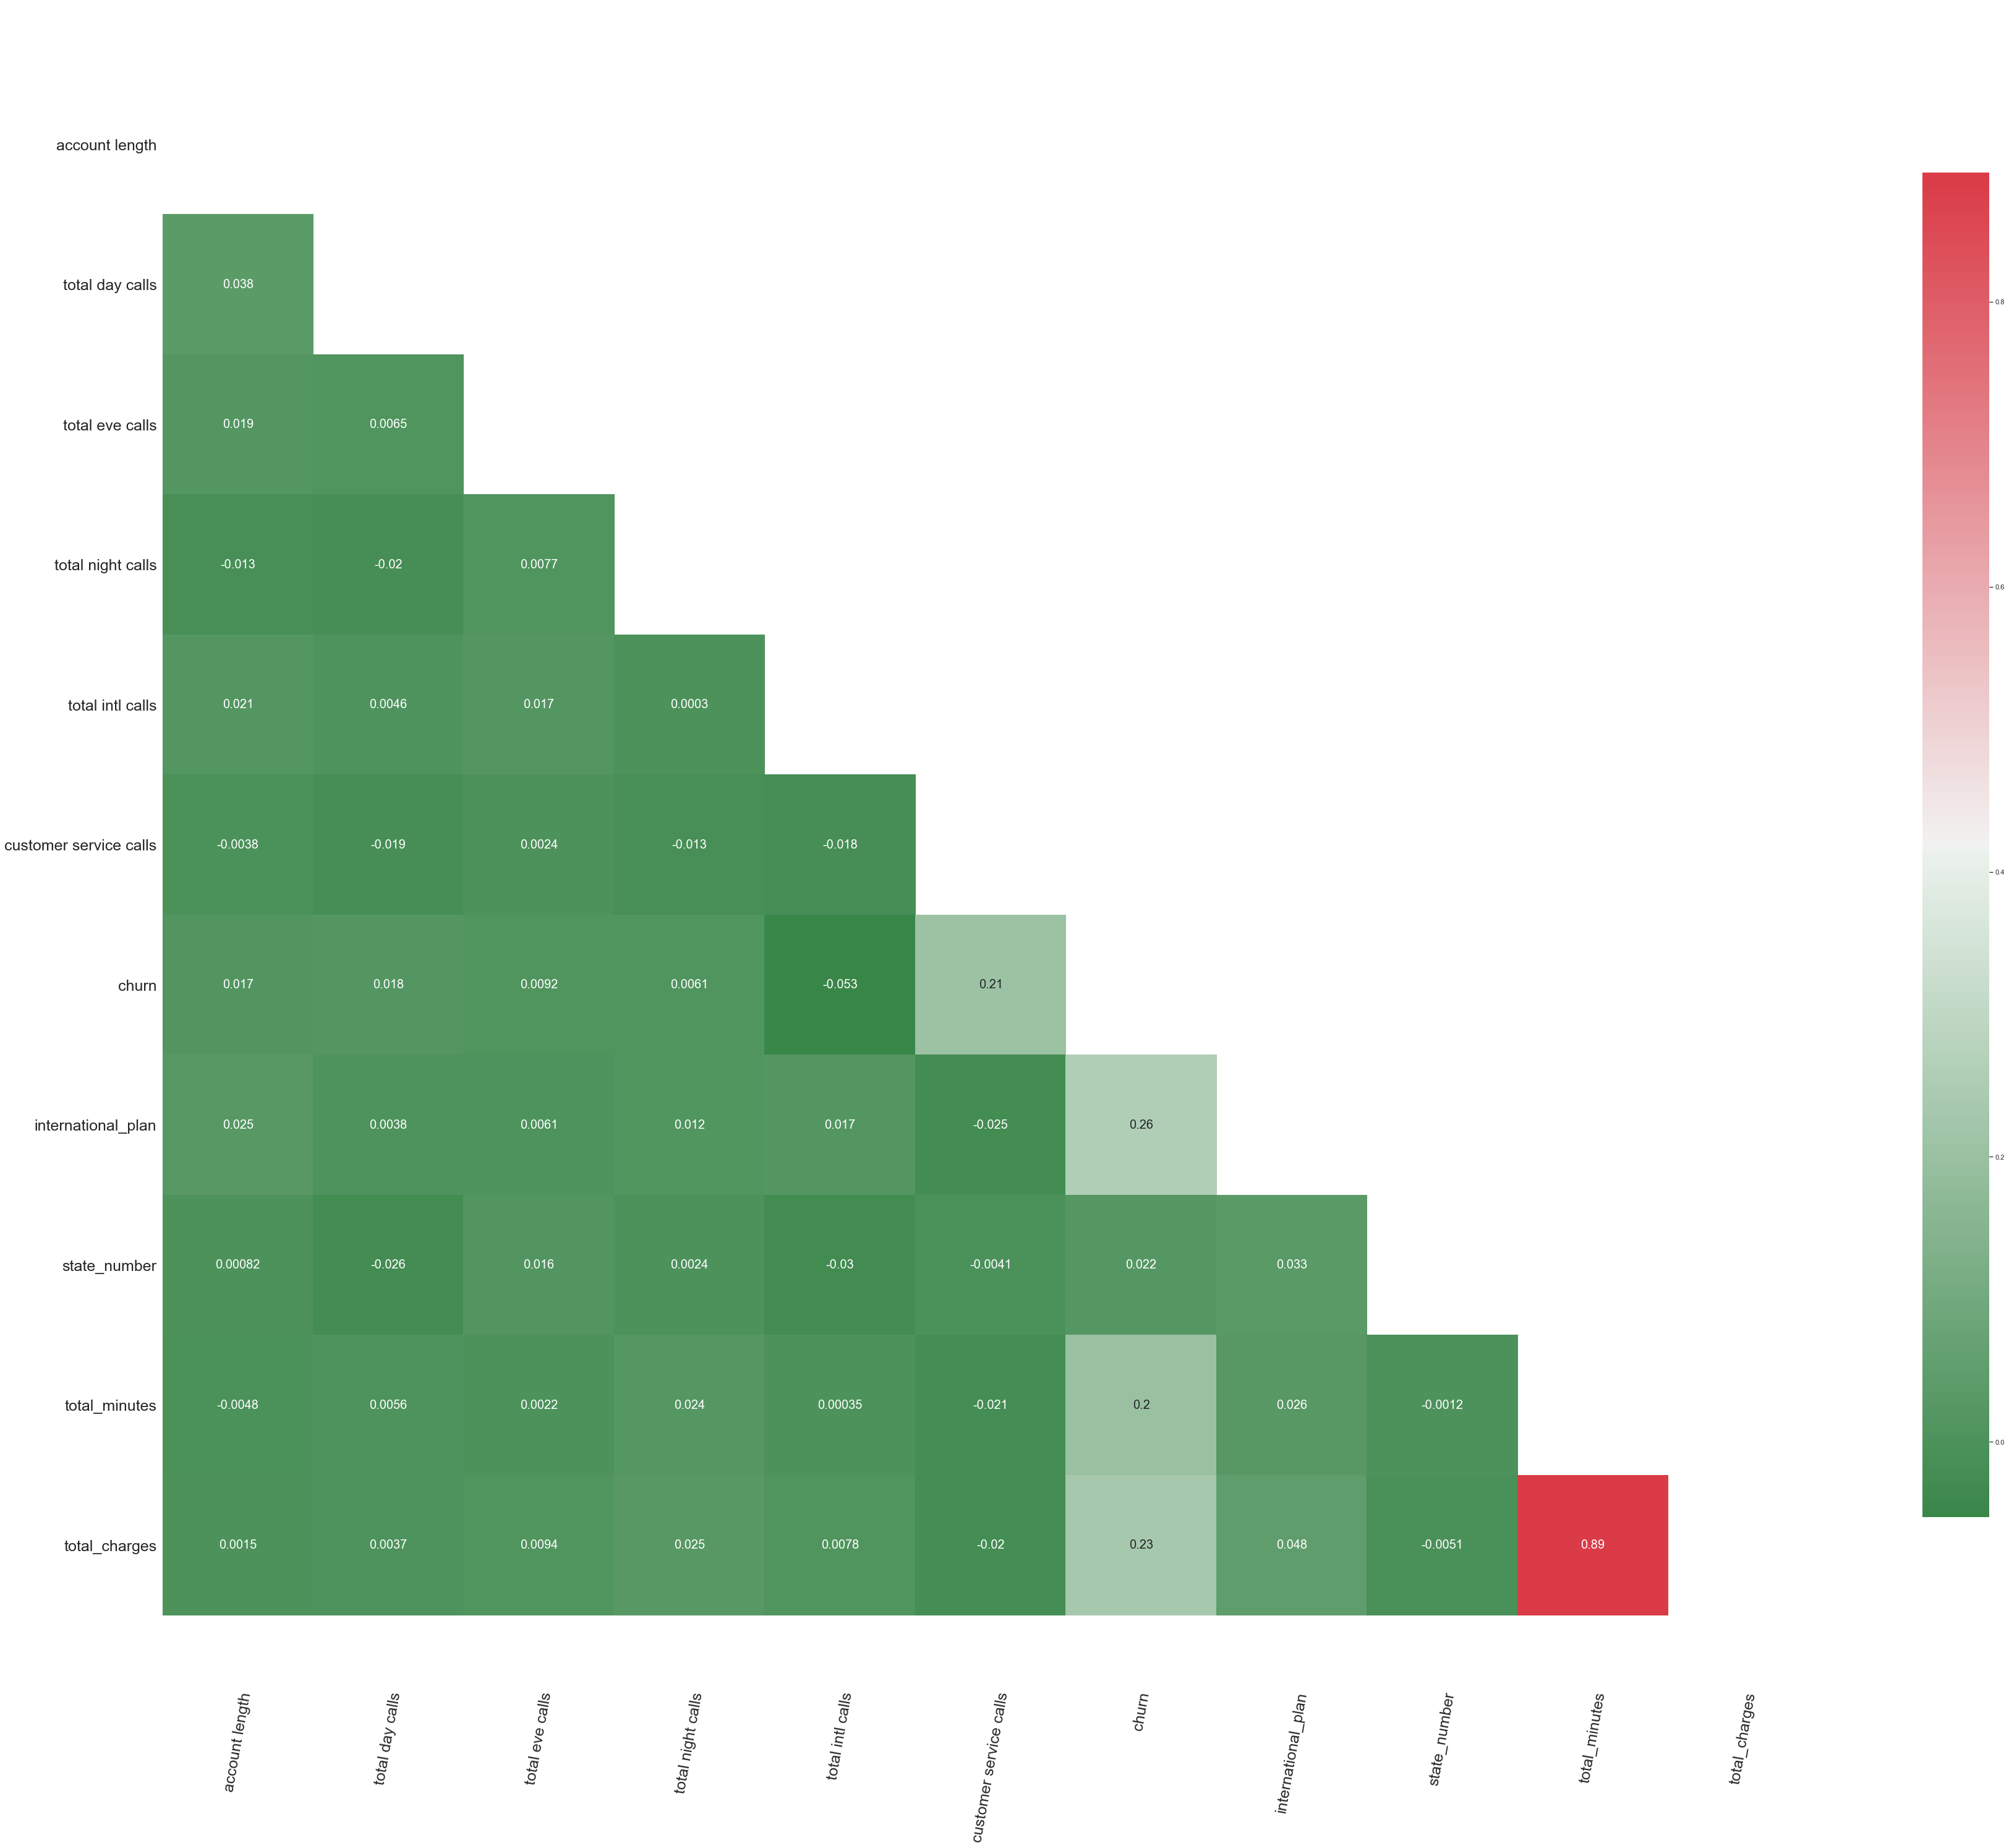

In [28]:
# Running the heatmap correlation code to check for any changes after feature engineering
sns.set(style="white")

# Creating the data
data = df_new.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))


# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10, as_cmap=True)  

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, 
                annot_kws={"size":20}, 
               cbar_kws={"shrink": 0.8}
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);


We conclude the feature engineering had an impact since the correlation between total minutes and the total charges slightly dropped.

### 4.3 Train-Test Split
Train-test split is a fundamental step in the process of developing and evaluating machine learning models. This method divides the available dataset into two subsets: a training set used to train the model, and a testing set used to assess its perfomance on unseen data. By training the model on one portion of the data and testing it on another independent subset, we can simulate how well the model generalizes to new, unseen observations. This approach is essential for assessing the model's predictive capabilities and ensuring that it can make accurate predictions on real-world data beyond the examples it was trained on. The train-test split serves as a critical component in model development, helping to gauge its effectiveness and reliability before deployment in practical applications.

I will use the 'random_state=42' and 'stratify=y'

In [29]:
# Splitting the data into features (X) and our target variable 'churn'(y)
X = df_new.drop('churn', axis=1)
y = df_new['churn']

# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [30]:
# Percentages of the true churn for the train and test targets
print("Train percent true churn:", y_train.value_counts(normalize=True)[1])
print("Test percent churn control: ", y_test.value_counts(normalize=True)[1])

Train percent true churn: 0.1448579431772709
Test percent churn control:  0.145083932853717


We notice we have almost equal percentages of true churn versus the test targets as it should be.

### 4.3 Baseline Model (Logistic Regression Model)
Employing a logistic regression model as a baseline is a common and insightful approach in the inital stages of developing predictive models, especially for binary classification tasks like predicting customer churn. It provides a straightforward yet effective means of understanding the relationship between independent variables and the probability of a binary outcome, making it a suitable choice for establishing a benchmark. It also paves way for more complex models and enhancements while offering a perfomance benchmark which to compare the effectiveness of subsequent, more sophistucated algorithms.

In [33]:
# Scaling the features using StandardScaler
scaler = StandardScaler()

# Fitting and transforming on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fitting a Logistic Regression model
baseline_model = LogisticRegression(random_state=42)

# Fitting the model on the scaled training data
baseline_model.fit(X_train_scaled, y_train)

# Predictions on the testing set
y_pred = baseline_model.predict(X_test_scaled)

# Checking the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Classification report
report_baseline = classification_report(y_test, y_pred)
print("Classification Report:\n", report_baseline)

Model Accuracy: 0.8597122302158273
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.97      0.92       713
        True       0.54      0.22      0.32       121

    accuracy                           0.86       834
   macro avg       0.71      0.60      0.62       834
weighted avg       0.83      0.86      0.83       834



The logistic regression model achieved an overall accuracy of approximately 85.97% on the evaluation dataset. The classification report provides a more detailed breakdown of performance metrics for each class. For the non-churn class (False), the precision is high at 88%, indicating that when the model predicts a customer will not churn, it is correct 88% of the time. The recall for this class is also high, at 96%, suggesting that the model effectively captures the majority of actual non-churn cases. However, for the churn class (True), the precision is lower at 54%, implying that when the model predicts churn, it is accurate only 48% of the time. The recall for churn is 22%, indicating that the model identifies approximately 22% of the actual churn cases. The F1-score, a balance between precision and recall, is 32% for churn. Overall, while the model demonstrates strong performance in predicting non-churn instances, there is room for improvement in identifying churn cases, reflected in lower precision and recall metrics for the positive class. The weighted average F1-score is 83%, providing a comprehensive measure of the model's effectiveness across both classes. The macro and weighted averages for precision, recall, and F1-score highlight the imbalanced nature of the classes, emphasizing the need for further model refinement to enhance its predictive capabilities, particularly in detecting instances of churn.

### 4.4 K-Nearest Neighbors Model
K-Nearest Neighbors (KNN) is a versatile and intuitive machine learning algorithm commonly used for classification and regression tasks. Operating on the principle of proximity, KNN assigns a data point's label based on the majority class of its nearest neighbors in feature space, making it particularly effective for tasks where local relationships and patterns play a significant role.

In [36]:
# Scaling the features using StandardScaler
scaler = StandardScaler()

# Fitting and transforming on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming testing data using the standard scaler
X_test_scaled = scaler.transform(X_test)

# Fitting a KNN model
knn_model = KNeighborsClassifier()
# Fit the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Predictions on the testing set
y_pred_knn = knn_model.predict(X_test_scaled)

# Model accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn}")

# Classification report
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)

KNN Model Accuracy: 0.8836930455635491
KNN Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.98      0.94       713
        True       0.73      0.31      0.44       121

    accuracy                           0.88       834
   macro avg       0.81      0.65      0.69       834
weighted avg       0.87      0.88      0.86       834



The K-Nearest Neighbors model demonstrates an improved accuracy of approximately 88.37% on the evaluation dataset compared to the logistic regression baseline. In the classification report, the KNN model exhibits strong precision for the non-churn class (False) at 89%, indicating a high accuracy in predicting customers who do not churn. The recall for this class is also high at 98%, highlighting the model's ability to effectively capture the majority of actual non-churn cases. However, for the churn class (True), while precision has improved to 73%, suggesting increased accuracy when predicting churn, the recall remains relatively lower at 31%. This indicates that while the KNN model performs well in identifying non-churn instances, there is room for further improvement in detecting churn cases. The macro and weighted averages for precision, recall, and F1-score underscore the model's overall effectiveness, emphasizing its enhanced performance compared to the logistic regression baseline.

### 4.5 Model Validation
This is the process whereby we assess the perfomance of Logistic Regression model and the KNN model to ensure they generalize well to new data

In [43]:
def compare_models_accuracy(model1, model2, X, y):
    accuracy_model1_cv = cross_val_score(model1, X, y, scoring="accuracy")
    accuracy_model1 = accuracy_model1_cv.mean()

    accuracy_model2_cv = cross_val_score(model2, X, y, scoring="accuracy")
    accuracy_model2 = accuracy_model2_cv.mean()

    return accuracy_model1, accuracy_model2

accuracy_baseline, accuracy_knn = compare_models_accuracy(baseline_model, knn_model, X_train, y_train)

print("Accuracy for Logistic Regression (Baseline):", accuracy_baseline)
print("Accuracy for KNN Model:", accuracy_knn)

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Accuracy for Logistic Regression (Baseline): 0.849539879759519
Accuracy for KNN Model: 0.8507430861723446


C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Precision for Logistic Regression (Baseline): 0.3541666666666667
Recall for Logistic Regression (Baseline): 0.04696132596685083
F1 Score for Logistic Regression (Baseline): 0.08292682926829267
ROC AUC for Logistic Regression (Baseline): 0.7177899518352003

Precision for KNN Model: 0.45454545454545453
Recall for KNN Model: 0.15193370165745856
F1 Score for KNN Model: 0.22774327122153212
ROC AUC for KNN Model: 0.5985167930464818


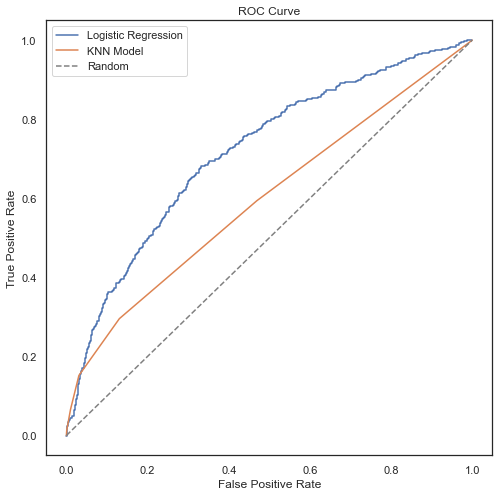

In [51]:
def compare_models_metrics(model1, model2, X, y, cv_splits=5, random_state=42):
    metrics = {
        'precision': [],
        'recall': [],
        'f1_score': [],
        'roc_auc': [],
        'roc_curve': None  
    }

    # Setting up cross-validation
    y_pred_model1 = cross_val_predict(model1, X, y, cv=cv_splits, method='predict_proba')[:, 1]
    y_pred_model2 = cross_val_predict(model2, X, y, cv=cv_splits, method='predict_proba')[:, 1]

    # Calculating the metrics
    metrics['precision'].append(precision_score(y, y_pred_model1.round()))
    metrics['recall'].append(recall_score(y, y_pred_model1.round()))
    metrics['f1_score'].append(f1_score(y, y_pred_model1.round()))
    metrics['roc_auc'].append(roc_auc_score(y, y_pred_model1))
    
    # Calculating ROC curve
    fpr_model1, tpr_model1, _ = roc_curve(y, y_pred_model1)
    metrics['roc_curve'] = {'fpr_model1': fpr_model1, 'tpr_model1': tpr_model1}

    metrics['precision'].append(precision_score(y, y_pred_model2.round()))
    metrics['recall'].append(recall_score(y, y_pred_model2.round()))
    metrics['f1_score'].append(f1_score(y, y_pred_model2.round()))
    metrics['roc_auc'].append(roc_auc_score(y, y_pred_model2))
    
    # Calculating ROC curve
    fpr_model2, tpr_model2, _ = roc_curve(y, y_pred_model2)
    metrics['roc_curve']['fpr_model2'] = fpr_model2
    metrics['roc_curve']['tpr_model2'] = tpr_model2

    return metrics

metrics = compare_models_metrics(baseline_model, knn_model, X_train, y_train)

# Print the metric values
print("Precision for Logistic Regression (Baseline):", metrics['precision'][0])
print("Recall for Logistic Regression (Baseline):", metrics['recall'][0])
print("F1 Score for Logistic Regression (Baseline):", metrics['f1_score'][0])
print("ROC AUC for Logistic Regression (Baseline):", metrics['roc_auc'][0])

print("\nPrecision for KNN Model:", metrics['precision'][1])
print("Recall for KNN Model:", metrics['recall'][1])
print("F1 Score for KNN Model:", metrics['f1_score'][1])
print("ROC AUC for KNN Model:", metrics['roc_auc'][1])

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(metrics['roc_curve']['fpr_model1'], metrics['roc_curve']['tpr_model1'], label='Logistic Regression')
plt.plot(metrics['roc_curve']['fpr_model2'], metrics['roc_curve']['tpr_model2'], label='KNN Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 4.6. Hyperparameter Tuning (Logistic Regression Model)
Logistic regression, while generally not requiring extensive hyperparameter tuning, occasionally benefits from adjustments to solvers, regularization, and the C parameter to influence model performance and convergence. Employing the GridSearch technique, we explore a defined parameter grid to identify optimal values, considering variations in solvers, regularization methods, and C parameters. In contrast to GridSearchCV's default 5-fold cross-validation, we opt for 'RepeatedStratifiedKFold' to enhance the robustness of our model evaluation. Additionally, in addressing class imbalance, we employ undersampling of the majority class to ensure a more equitable representation of both churn and non-churn instances in our training process.

In [53]:
# Defining the pipeline with preprocessing, Logistic Regression, and undersampling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('undersample', RandomUnderSampler(sampling_strategy='auto', random_state=42)),  # Undersampling
    ('logreg', LogisticRegression())  # Logistic Regression model
])

# Defining the hyperparameter grid for grid search
param_grid = {
    'logreg__penalty': ['l1', 'l2'],  # Regularization penalty
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization parameter
}

# Creatingt the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fiting the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueEr

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueEr

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueEr

Best Parameters: {'logreg__C': 10, 'logreg__penalty': 'l2'}
Best Accuracy: 0.7635070140280561


In [55]:
# Creating the final logistic regression model with the best hyperparameters
final_logreg_model = Pipeline([
    ('scaler', StandardScaler()),
    ('undersample', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('logreg', LogisticRegression(C=100, penalty='l2'))
])

# Fitting the final model on the entire training set
final_logreg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_test = final_logreg_model.predict(X_test)

# Evaluating the final model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Final Model Accuracy on Test Set:", accuracy_test)

# Classification report on the test set
report_test = classification_report(y_test, y_pred_test)
print("Final Model Classification Report on Test Set:\n", report_test)

Final Model Accuracy on Test Set: 0.7482014388489209
Final Model Classification Report on Test Set:
               precision    recall  f1-score   support

       False       0.94      0.75      0.84       713
        True       0.33      0.73      0.46       121

    accuracy                           0.75       834
   macro avg       0.64      0.74      0.65       834
weighted avg       0.85      0.75      0.78       834



This final model, utilizing hyperparameter tuning in logistic regression with class balancing through undersampling, achieves an accuracy of approximately 74.82% on the test set. While this accuracy is lower than that of the K-Nearest Neighbors (KNN) model and the logistic regression baseline, it represents an improvement over the logistic regression baseline. The precision and recall for both churn and non-churn classes are more balanced, with a notable increase in churn recall compared to the logistic regression baseline. Despite not surpassing the KNN model's accuracy, the final logistic regression model strikes a better balance between precision and recall for both classes, showcasing its effectiveness in predicting customer churn.

## 5. EVALUATION OF MODELS
The three models—logistic regression, K-Nearest Neighbors (KNN), and the final logistic regression with hyperparameter tuning and undersampling—demonstrate varying performances in predicting customer churn.

The initial logistic regression model, despite its simplicity, provided a baseline accuracy of approximately 85.97%. However, it exhibited a challenge in effectively identifying instances of churn, as reflected in lower precision and recall for the positive class. This indicated a need for model improvement.

The KNN model, introduced as an alternative, showcased an accuracy of about 88.37%, outperforming the baseline logistic regression. While the KNN model excelled in predicting non-churn instances, it struggled with identifying churn cases, emphasizing the trade-off between precision and recall.

The final logistic regression model, featuring hyperparameter tuning and undersampling, achieved an accuracy of around 74.82%. Although this accuracy is lower than the KNN model, it represents an enhancement over the baseline logistic regression. Notably, this final model achieved a more balanced precision and recall for both churn and non-churn classes, highlighting its effectiveness in addressing the class imbalance issue.

In summary, each model exhibited distinct strengths and weaknesses. The logistic regression models, in their initial and final forms, provided interpretability and simplicity, with the final model showcasing improvements in capturing churn instances. The KNN model, while achieving the highest accuracy, faced challenges in precision and recall for churn cases. The choice between these models depends on the specific objectives and trade-offs desired, with the final logistic regression offering a balanced approach between accuracy and class-specific performance.